In [23]:
import torch
import torch.nn.functional as F
import utils
from importlib import reload
reload(utils)

<module 'utils' from '/home/amitaharoni/workspace/cv-sprint/models/utils.py'>

In [24]:
train_dl, valid_dl, test_dl = utils.make_tiny_imagenet_dataloaders()

In [25]:
class AlexNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            # 64x64 => 30x30
            torch.nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=2),
            torch.nn.BatchNorm2d(num_features=10),
            torch.nn.ReLU(),
            # 30x30 => 15x15
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # 15x15 => 13x13
            torch.nn.Conv2d(in_channels=10, out_channels=32, kernel_size=3),
            torch.nn.BatchNorm2d(num_features=32),
            torch.nn.ReLU(),
            # 13x13 => 6x6
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same'),
            torch.nn.BatchNorm2d(num_features=64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding='same'),
            torch.nn.BatchNorm2d(num_features=96),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=96, out_channels=128, kernel_size=3, padding='same'),
            torch.nn.BatchNorm2d(num_features=128),
            torch.nn.ReLU(),
            # 6x6 => 3x3
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # 3x3x128 => 1152
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=1152, out_features=512),
            torch.nn.BatchNorm1d(num_features=512),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(in_features=512, out_features=256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(in_features=256, out_features=200),
        )

    def forward(self, x):
        return self.layers(x)

model = AlexNet()
model = model.to(utils.device)
model

AlexNet(
  (layers): Sequential(
    (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(10, 32, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (12): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (15): BatchNorm2d(128, eps=1e-05,

In [26]:
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())

In [27]:
hist = utils.train_model(model, train_dl, valid_dl, loss_fn, optim, 
                         tensorboard_dir='../runs/01-alexnet', metrics=[utils.metric_accuracy],
                         epochs=1000,
                         patience=4)

  0%|          | 0/1407 [00:00<?, ?it/s]

100%|██████████| 157/157 [00:01<00:00, 131.12it/s]


Epoch 1/1000: train_loss=4.5439, train_accuracy=0.0698, val_loss=4.1918, val_accuracy=0.1063
Saving params from epoch 1. Best loss: 4.1918


100%|██████████| 157/157 [00:01<00:00, 143.43it/s]


Epoch 2/1000: train_loss=3.9674, train_accuracy=0.1392, val_loss=3.8893, val_accuracy=0.1558
Saving params from epoch 2. Best loss: 3.8893


100%|██████████| 157/157 [00:01<00:00, 140.25it/s]


Epoch 3/1000: train_loss=3.7175, train_accuracy=0.1764, val_loss=3.8558, val_accuracy=0.1627
Saving params from epoch 3. Best loss: 3.8558


100%|██████████| 157/157 [00:01<00:00, 144.46it/s]


Epoch 4/1000: train_loss=3.5478, train_accuracy=0.2005, val_loss=3.5830, val_accuracy=0.2013
Saving params from epoch 4. Best loss: 3.5830


100%|██████████| 157/157 [00:01<00:00, 107.22it/s]


Epoch 5/1000: train_loss=3.4080, train_accuracy=0.2263, val_loss=3.5960, val_accuracy=0.1998


100%|██████████| 157/157 [00:01<00:00, 135.39it/s]


Epoch 6/1000: train_loss=3.2871, train_accuracy=0.2465, val_loss=3.4840, val_accuracy=0.2200
Saving params from epoch 6. Best loss: 3.4840


100%|██████████| 157/157 [00:01<00:00, 133.98it/s]


Epoch 7/1000: train_loss=3.1739, train_accuracy=0.2644, val_loss=3.5345, val_accuracy=0.2228


100%|██████████| 157/157 [00:01<00:00, 136.12it/s]


Epoch 8/1000: train_loss=3.0749, train_accuracy=0.2803, val_loss=3.3317, val_accuracy=0.2534
Saving params from epoch 8. Best loss: 3.3317


100%|██████████| 157/157 [00:01<00:00, 133.91it/s]


Epoch 9/1000: train_loss=2.9698, train_accuracy=0.3001, val_loss=3.2180, val_accuracy=0.2649
Saving params from epoch 9. Best loss: 3.2180


100%|██████████| 157/157 [00:01<00:00, 137.92it/s]


Epoch 10/1000: train_loss=2.8724, train_accuracy=0.3167, val_loss=3.2414, val_accuracy=0.2697


100%|██████████| 157/157 [00:01<00:00, 121.66it/s]


Epoch 11/1000: train_loss=2.7748, train_accuracy=0.3339, val_loss=3.2608, val_accuracy=0.2630


100%|██████████| 157/157 [00:01<00:00, 135.96it/s]


Epoch 12/1000: train_loss=2.6775, train_accuracy=0.3491, val_loss=3.2756, val_accuracy=0.2683


100%|██████████| 157/157 [00:01<00:00, 129.34it/s]


Epoch 13/1000: train_loss=2.5954, train_accuracy=0.3638, val_loss=3.3285, val_accuracy=0.2693


100%|██████████| 157/157 [00:01<00:00, 128.48it/s]


Epoch 14/1000: train_loss=2.5146, train_accuracy=0.3794, val_loss=3.3199, val_accuracy=0.2709


100%|██████████| 157/157 [00:01<00:00, 125.13it/s]


Epoch 15/1000: train_loss=2.4261, train_accuracy=0.3953, val_loss=3.4145, val_accuracy=0.2614


100%|██████████| 157/157 [00:01<00:00, 138.39it/s]


Epoch 16/1000: train_loss=2.3470, train_accuracy=0.4090, val_loss=3.3958, val_accuracy=0.2672


100%|██████████| 157/157 [00:01<00:00, 134.93it/s]


Epoch 17/1000: train_loss=2.2700, train_accuracy=0.4255, val_loss=3.3993, val_accuracy=0.2710


100%|██████████| 157/157 [00:01<00:00, 132.12it/s]


Epoch 18/1000: train_loss=2.1927, train_accuracy=0.4375, val_loss=3.5144, val_accuracy=0.2668


100%|██████████| 157/157 [00:01<00:00, 120.70it/s]

Epoch 19/1000: train_loss=2.1301, train_accuracy=0.4512, val_loss=3.5575, val_accuracy=0.2539
Loading model params from epoch 9


In [28]:
utils.evaluate_model(model, test_dl, loss_fn, metrics=[utils.metric_accuracy])

{'loss': 3.2410509719848632, 'accuracy': 0.2708}

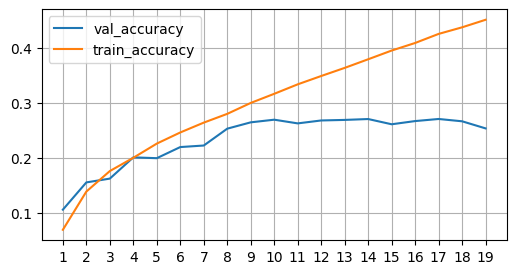

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(hist['epoch'], hist['val_accuracy'], label='val_accuracy')
ax.plot(hist['epoch'], hist['train_accuracy'], label='train_accuracy')
ax.legend(loc='upper left')
ax.set_xticks(hist['epoch'])
ax.grid()
plt.show()